# Wai Ying Wong - Classification on Load Type


### Reference: 
Steel Industry Energy Consumption Dataset Data Set. (2021). UCI Machine Learning Repository.

Sathishkumar V E,
Department of Information and Communication Engineering,
Sunchon National University, Suncheon.
Republic of Korea.
Email: srisathishkumarve '@' gmail.com

## Introduction 

This is a steel industry dataset stored on the Korea Electric Power Corporation website that contains information about steel energy consumption. This dataset will help build the classification model based on energy usage patterns and predicts the load type. 

## Summary of steps in this machine learning 

Firstly we will understand and explore the dataset. Then, prepare the dataset with data preprocessing and transformation. After that, we will work on the model planning with ten classification models and pick the best model with the highest accuracy. The model will be implemented with hyperparameter tuning Grid Search CV. Lastly, we will use the model to predict the classes and present it with a confusion matrix. The out of sample prediction is the example of how this model can be used in real life.

# 1. Library import

In [1]:
#These are the libraries we will use in the following

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import norm
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# %matplotlib inline



# 2. Load Data  

In [2]:
#Load the datafile and print out first few rows in the dataset
csv_file = ('Dataset/Steel_industry_data.csv')
df = pd.read_csv(csv_file)
df.head() 

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [3]:
#Drop the index column
df.reset_index(drop=True, inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [4]:
#Rename some columns
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Reactive_Power_kVarh',
                        'Leading_Current_Reactive_Power_kVarh': 'Leading_Reactive_Power_kVarh',
                        'Lagging_Current_Power_Factor': 'Lagging_Power_Factor',
                        'Leading_Current_Power_Factor': 'Leading_Power_Factor',
                        'CO2(tCO2)':'CO2'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          35040 non-null  object 
 1   Usage_kWh                     35040 non-null  float64
 2   Lagging_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                           35040 non-null  float64
 5   Lagging_Power_Factor          35040 non-null  float64
 6   Leading_Power_Factor          35040 non-null  float64
 7   NSM                           35040 non-null  int64  
 8   WeekStatus                    35040 non-null  object 
 9   Day_of_week                   35040 non-null  object 
 10  Load_Type                     35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


In [5]:
#Check if there is missing value 
df.isnull().sum().sort_values(ascending=False)

date                            0
Usage_kWh                       0
Lagging_Reactive_Power_kVarh    0
Leading_Reactive_Power_kVarh    0
CO2                             0
Lagging_Power_Factor            0
Leading_Power_Factor            0
NSM                             0
WeekStatus                      0
Day_of_week                     0
Load_Type                       0
dtype: int64

No missing value in the dataset. 

In [6]:
#Check the details for dates
df["date"].value_counts()

01/01/2018 00:15    1
01/09/2018 08:45    1
01/09/2018 07:15    1
01/09/2018 07:30    1
01/09/2018 07:45    1
                   ..
02/05/2018 14:45    1
02/05/2018 14:30    1
02/05/2018 14:15    1
02/05/2018 14:00    1
31/12/2018 00:00    1
Name: date, Length: 35040, dtype: int64

In [7]:
#count the value for load type 
df["Load_Type"].value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

# 3. Exploratory Data Analysis

In [8]:
 #Summary statistics of the datase
df.describe()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [9]:
# Print out the correlation of the features
df.corr() 

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


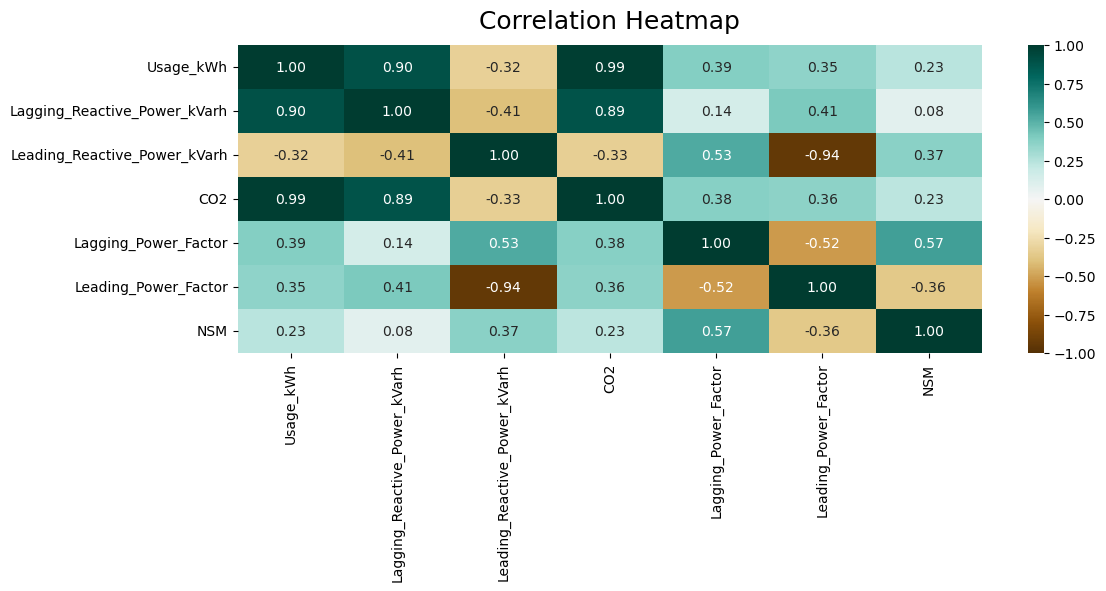

In [10]:
#Plot the heatmap of the correlation.
plt.figure(figsize=(12, 4))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


We can see the correlation of the numeric values features. For example, Usage has high correlation with Lagging Reactive Power and CO2. Lagging Reative Power has high correlation with Usage and CO2. 

/var/folders/vf/gr2s_7mx6ds2_sy6fb4qp_x40000gn/T/ipykernel_71794/3380109681.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


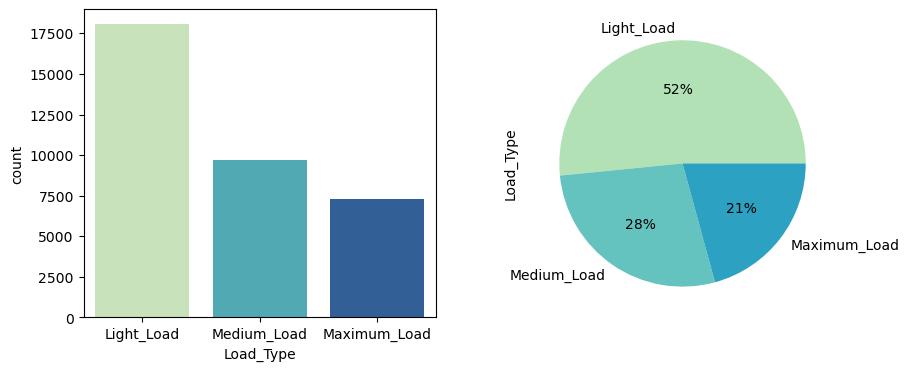

In [11]:
#Check target "Load_Type" distribution and % 
fig, ax =plt.subplots(1,2, figsize=(10,4))

sns.countplot(data=df, x="Load_Type",palette = 'YlGnBu', ax=ax[0])

loadtype_count = df.Load_Type.value_counts()
color2 = sns.color_palette('YlGnBu')[1:5]
loadtype_count.plot(kind='pie' ,colors = color2, autopct='%1.0f%%' , ax=ax[1])


fig.show()


We are see that the 'Light load type' has the highest contribution which contributed 52% of the total. 

/var/folders/vf/gr2s_7mx6ds2_sy6fb4qp_x40000gn/T/ipykernel_71794/642756895.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


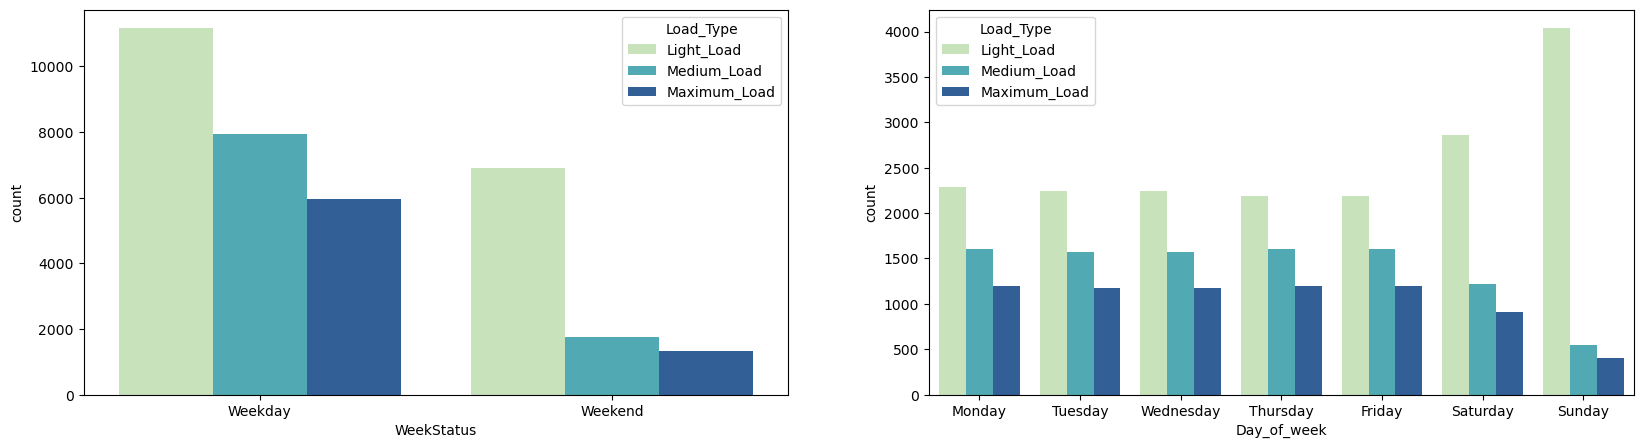

In [12]:
#Plot the categorical columns WeekStatus and Day_of_week and divided by Target - Load type 

fig, ax =plt.subplots(1,2, figsize=(20,5))

sns.countplot(data=df, x="WeekStatus", hue="Load_Type",palette='YlGnBu', ax=ax[0])
sns.countplot(data=df, x="Day_of_week", hue="Load_Type",palette='YlGnBu', ax=ax[1])

fig.show()


'Light load type' has higher proportion on Weekends especially on Sunday. 

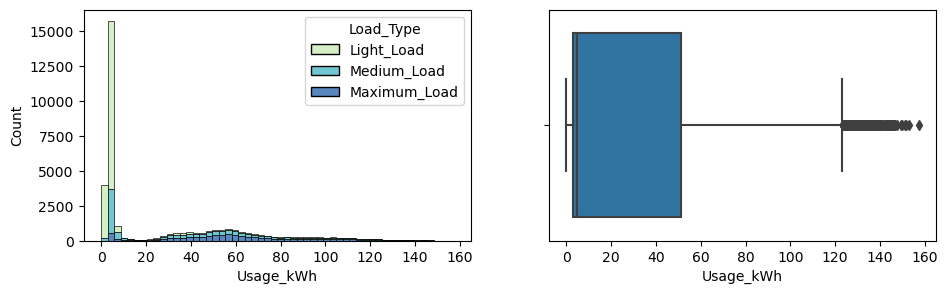

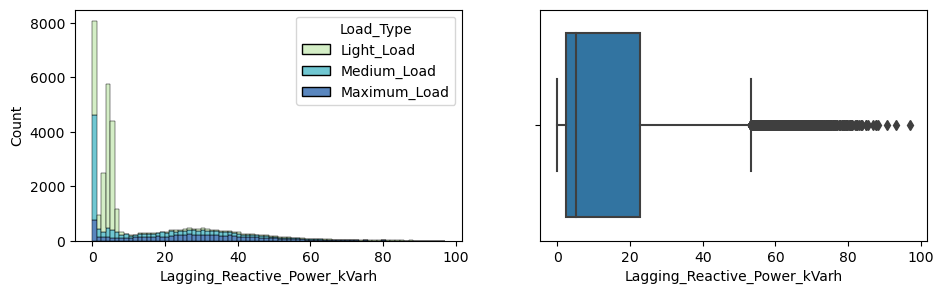

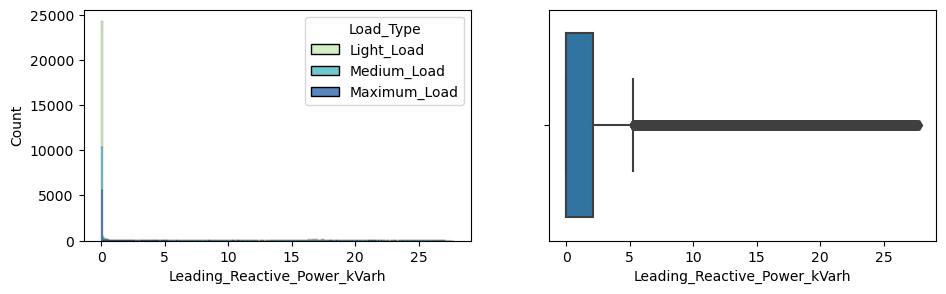

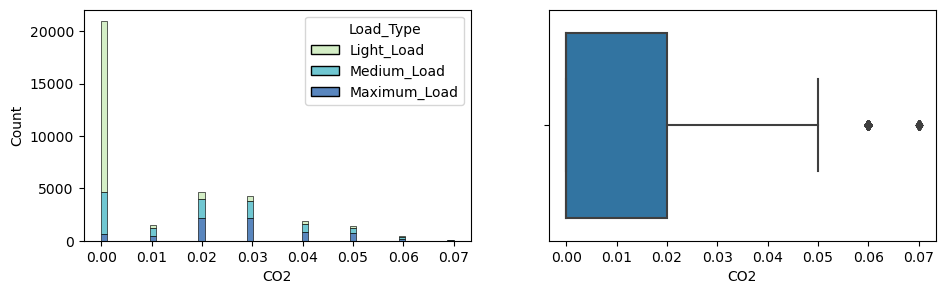

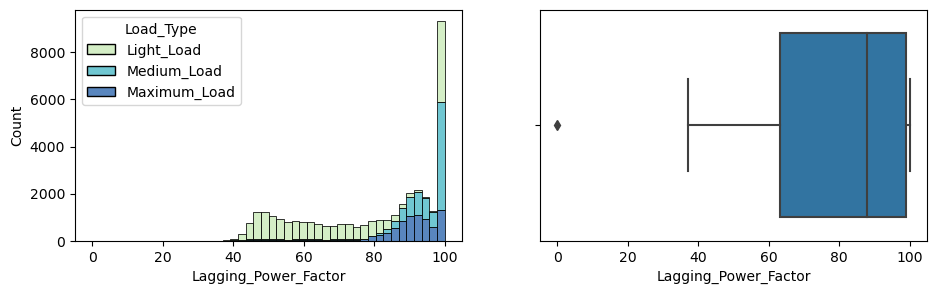

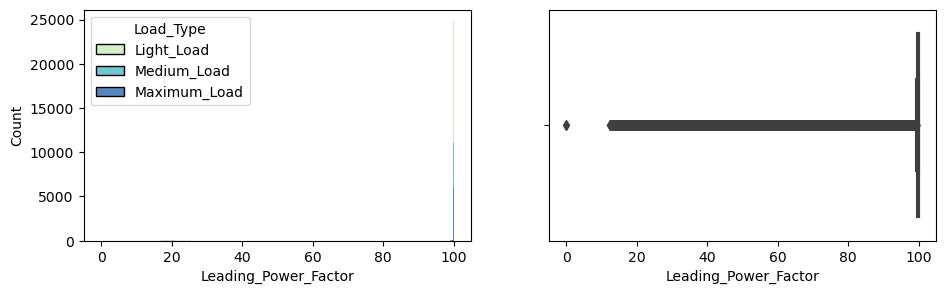

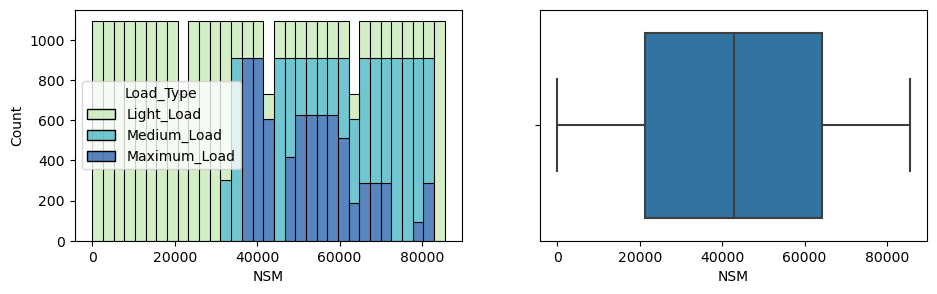

In [13]:
#Plot the numerical columns distribution and divided by Load_Type

numerical = df.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(11,3))
    sns.histplot(data=df, x=col, ax=ax[0],hue='Load_Type', palette='YlGnBu', multiple="stack")
    sns.boxplot(data=df, x=col, ax=ax[1])

The distribution charts above show the numberic values in the dataset. There are few insights we can draw. 

Most energy consumption usages are below 4.5kWh, and more than 15000 records are between 2.5 and 4.5kWh. 
Lagging Reactive Power are mainly below 10kVarh.
The majority of Lagging Reactive Power are at 0kVarh. 
More than 15000 Light Load and half of Medium Load at 0.00 CO2.
The Lagging Power Factor mainly distributes between 40 to 100.
the Leading Power Factor only gathers at 100. 
35000 NSM or below is Light Load. Between 35000 to 60000 NSM are contributed by Maximum Load, and from 60000 to 80000 are mainly from Medium Load.

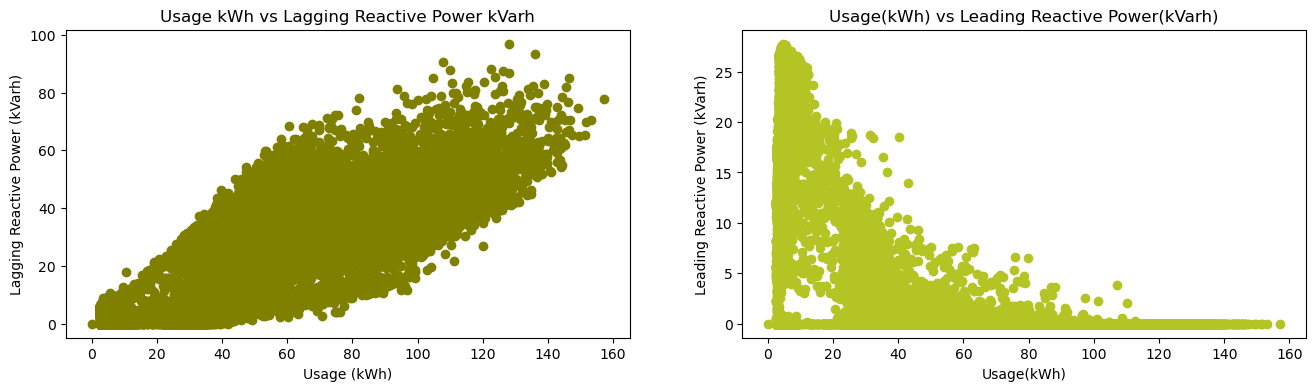

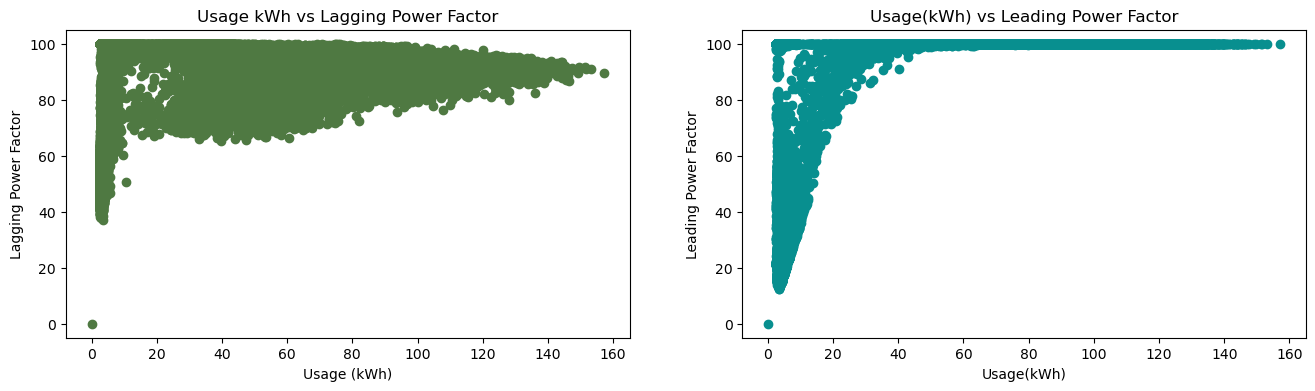

In [14]:
#Create the scatter plot to compare the Usage_kWh and Lagging/ Leading power. 

fig, (ax1,ax2) =plt.subplots(1,2, figsize=(16,4))
fig, (ax3,ax4) =plt.subplots(1,2, figsize=(16,4))

ax1.scatter(df.Usage_kWh, df.Lagging_Reactive_Power_kVarh, c='#808000') #Create the scatter plot to compare the emissions with the remaining fuel efficiency column.
ax1.set_title("Usage kWh vs Lagging Reactive Power kVarh")
ax1.set_xlabel("Usage (kWh)")
ax1.set_ylabel("Lagging Reactive Power (kVarh)")

ax2.scatter(df.Usage_kWh,df.Leading_Reactive_Power_kVarh, c='#B4C424') 
ax2.set_title("Usage(kWh) vs Leading Reactive Power(kVarh)")
ax2.set_xlabel("Usage(kWh)")
ax2.set_ylabel("Leading Reactive Power (kVarh)")

ax3.scatter(df.Usage_kWh, df.Lagging_Power_Factor, c='#4F7942')
ax3.set_title("Usage kWh vs Lagging Power Factor")
ax3.set_xlabel("Usage (kWh)")
ax3.set_ylabel("Lagging Power Factor")

ax4.scatter(df.Usage_kWh,df.Leading_Power_Factor, c='#088F8F') 
ax4.set_title("Usage(kWh) vs Leading Power Factor")
ax4.set_xlabel("Usage(kWh)")
ax4.set_ylabel("Leading Power Factor")

plt.show()


The scatterplot at the top left shows a moderately strong and positive relationship of lagging reactive power and usage While the scatterplot at the right top shows a negative association between leading reactive power and usage.
The scatterplots in the buttom shows the relationship of usage vs lagging power factor and usage vs leading power factor which both do not show a very strong positive relation. However, we can still see that the high lagging or leading power, the usage are also high as well. 


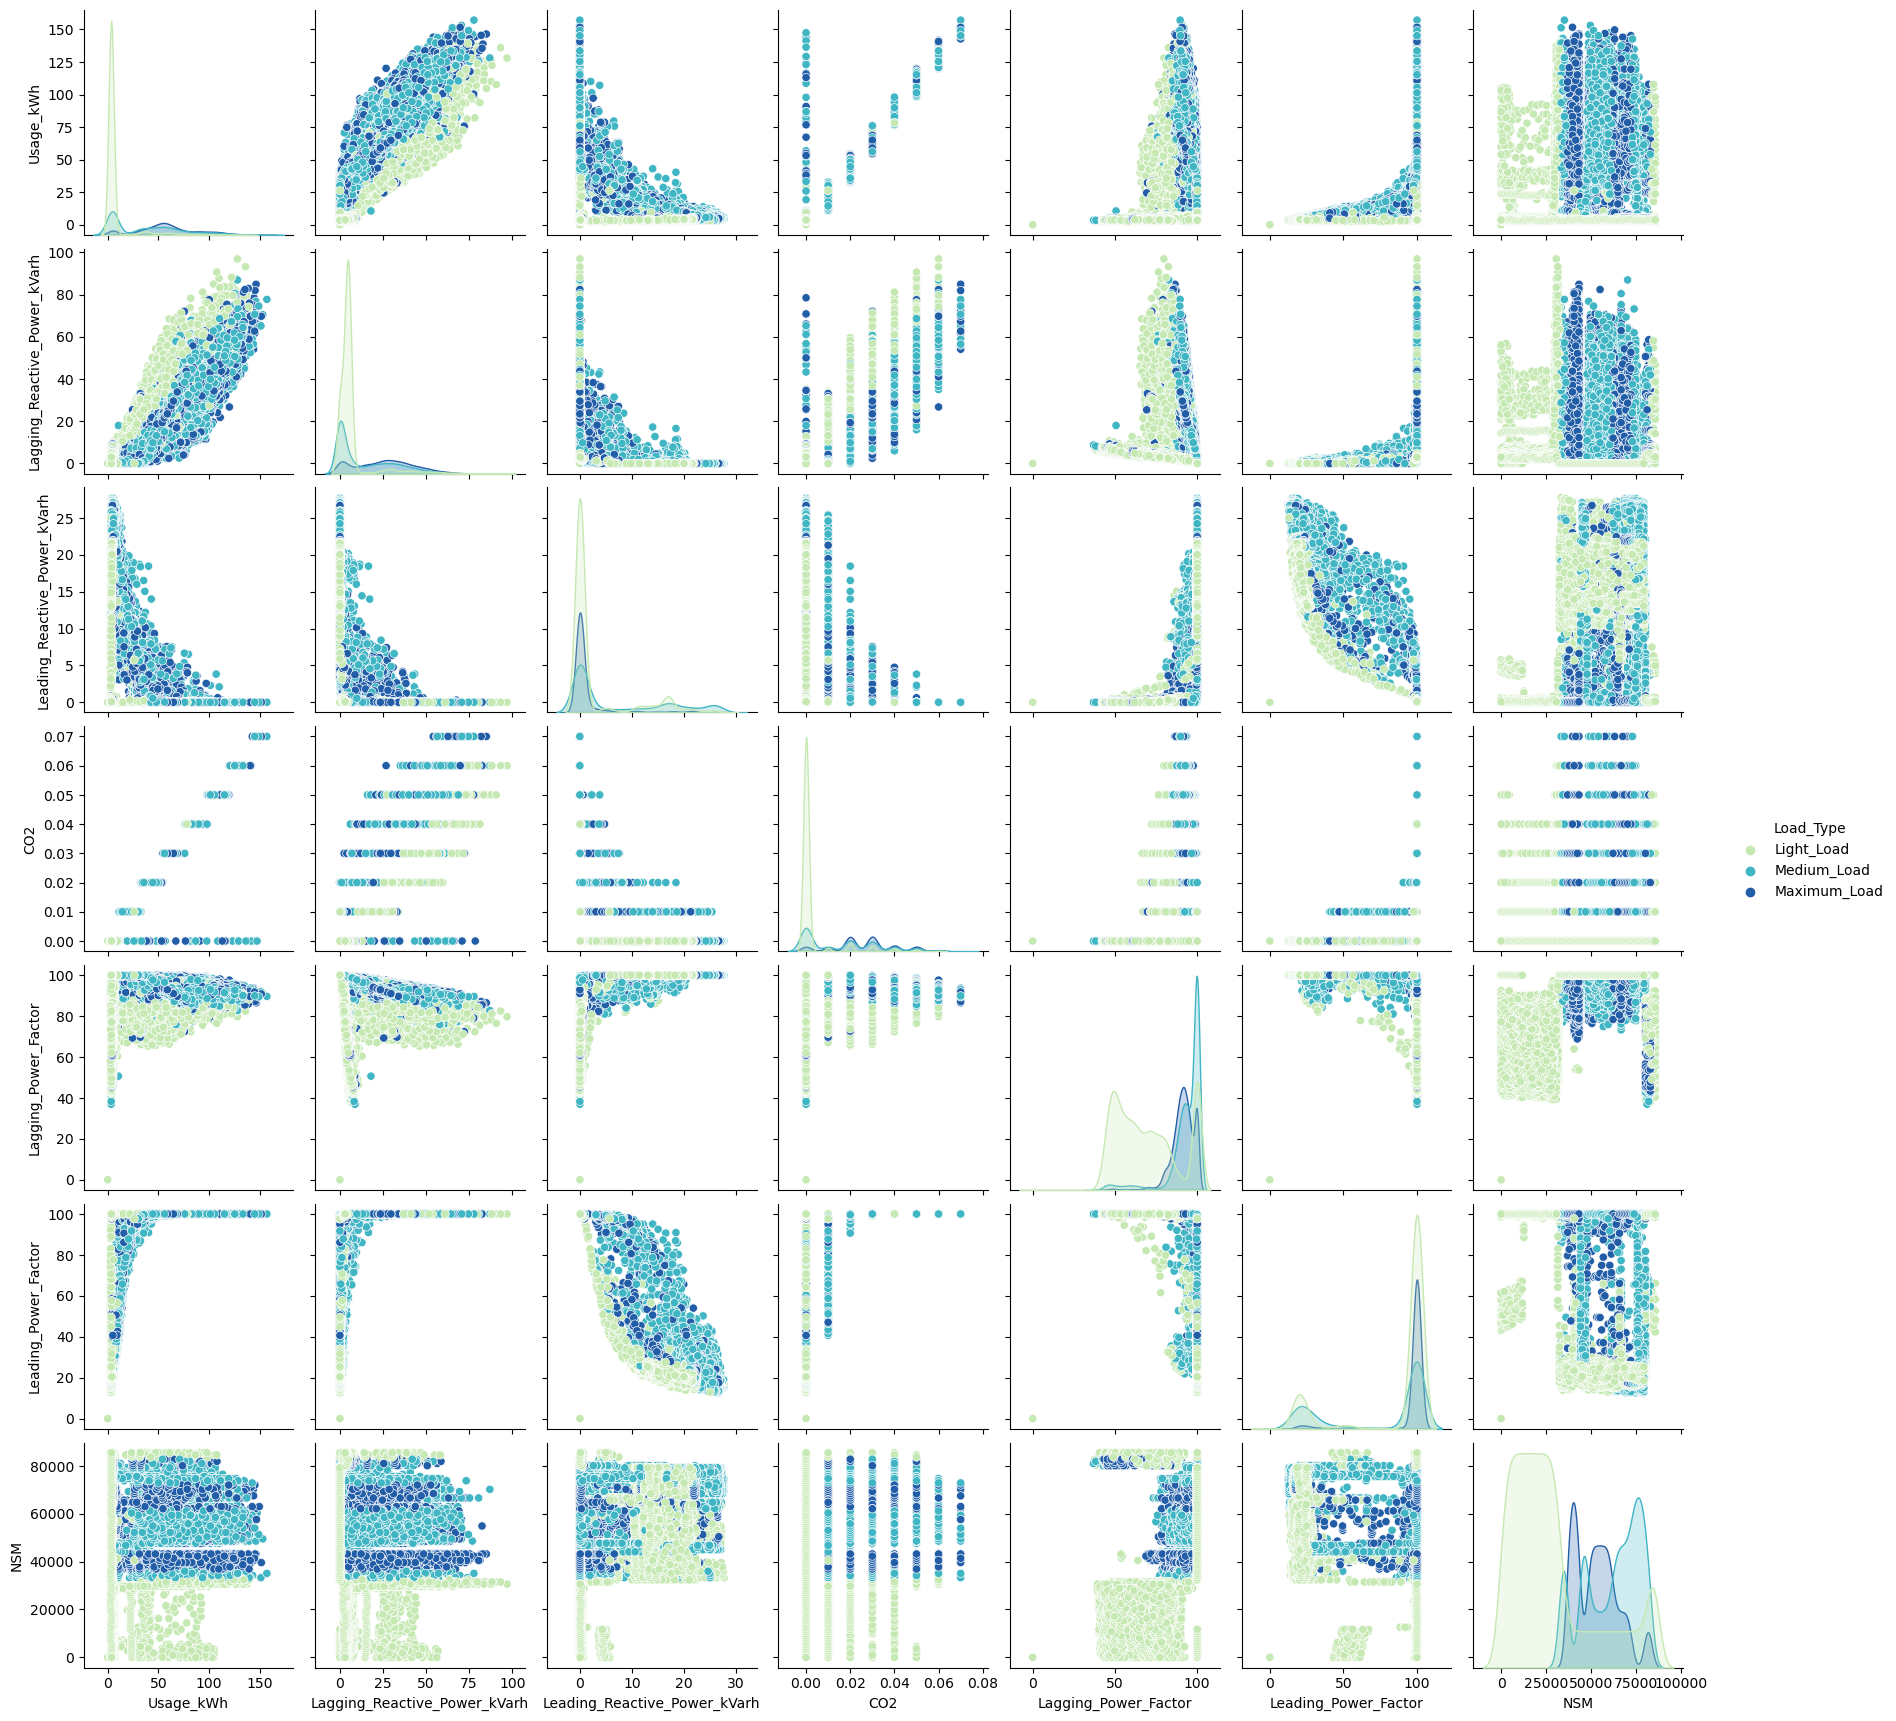

In [15]:
#Create the plot pairwise relationships in a dataset and split with load type

figsize=(24,12)
sns.pairplot(df, hue='Load_Type', palette='YlGnBu')

# 4. Data Transformation (dummy features)

In [16]:
# Encode Categorical Columns
categ = df.select_dtypes(include = "object").columns

le = preprocessing.LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

df.head()

,date,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,2,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,3,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,4,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,5,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


In [17]:
#count the value for load type after LabelEncoder
df["Load_Type"].value_counts()

0    18072
2     9696
1     7272
Name: Load_Type, dtype: int64

By checking the value we can see that 

0 = Light Load

2 = Medium Load  

1 = Maximum Load

In [18]:
#check the correlation 
df.corr()

,date,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,1.000000,-0.011093,-0.013170,-0.013660,-0.003346,0.024473,0.005546,2.739577e-03,-8.928788e-03,7.891603e-03,0.015578
Usage_kWh,-0.011093,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,2.346103e-01,-2.954748e-01,3.986516e-02,0.444092
Lagging_Reactive_Power_kVarh,-0.013170,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,8.266237e-02,-3.198698e-01,4.377958e-02,0.249674
Leading_Reactive_Power_kVarh,-0.013660,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,3.716046e-01,2.604306e-01,-1.978464e-02,0.223557
CO2,-0.003346,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,2.317260e-01,-2.904670e-01,3.623573e-02,0.437742
Lagging_Power_Factor,0.024473,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,5.652695e-01,5.408210e-02,1.597357e-03,0.559395
Leading_Power_Factor,0.005546,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-3.605630e-01,-3.146749e-01,2.110457e-02,-0.131382
NSM,0.002740,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000e+00,-9.027984e-17,-4.015553e-17,0.593049
WeekStatus,-0.008929,-0.295475,-0.319870,0.260431,-0.290467,0.054082,-0.314675,-9.027984e-17,1.000000e+00,-1.560818e-01,-0.203308
Day_of_week,0.007892,0.039865,0.043780,-0.019785,0.036236,0.001597,0.021105,-4.015553e-17,-1.560818e-01,1.000000e+00,0.012682


In [19]:
#drop date as it has low correlation 

df1 = df.drop('date', axis='columns') 
df1.shape

(35040, 10)

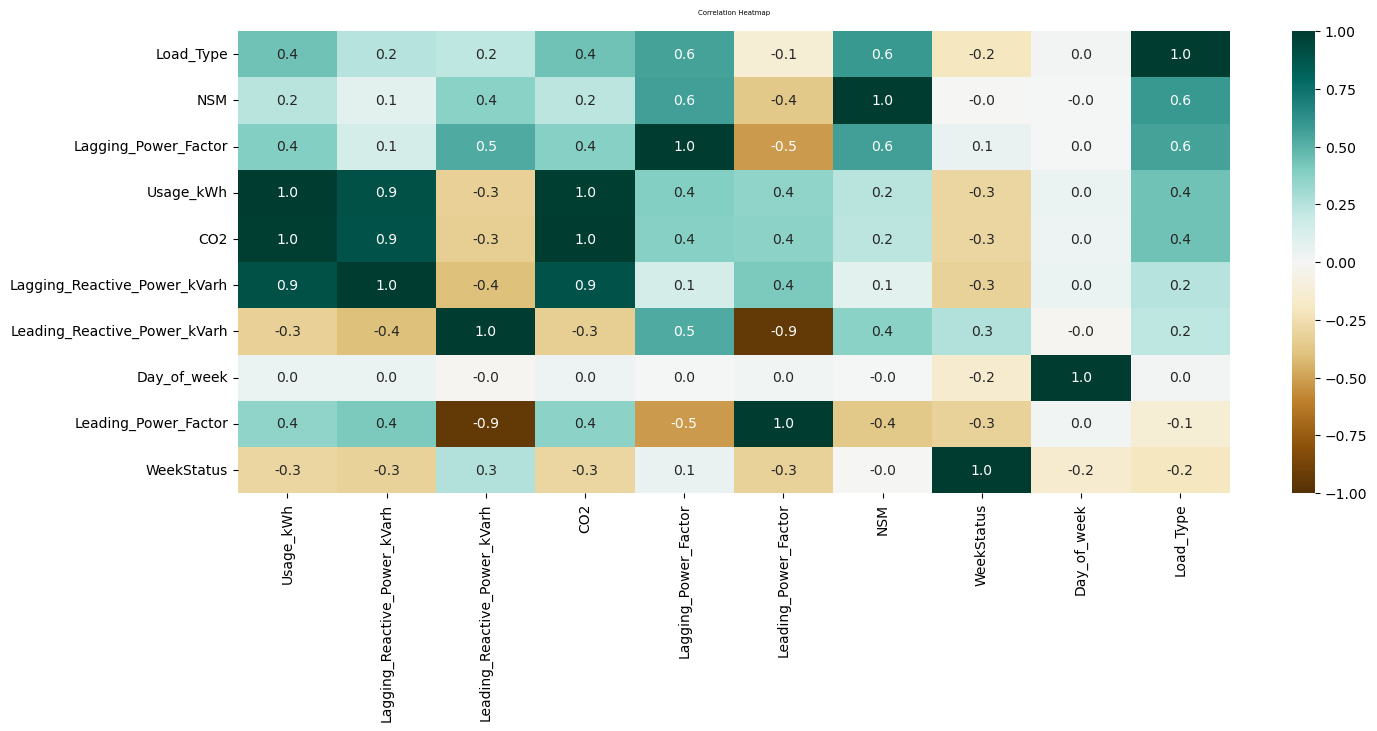

In [20]:
#Plot the heatmap of the correlation.

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr().sort_values(by=['Load_Type'],ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt=".1f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':5}, pad=12);


After the catergorical columns change to numbers, we can see the correlation of Load Type with other values. 

In [21]:
#save the cleaned and transformed dataset into a new csv file

df1.to_csv('Dataset/Steel_industry_data_cleaned.csv', index=False)

# 5. Prepare the features and target variable

## Split the dataset and prepare some lists to store the models


In [22]:
# Split the dataset and prepare some lists to store the models

X = df1.drop(['Load_Type'], axis=1)
y = df1.Load_Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42) 

# 6. Create a pipeline

### Train Various Classification Models

In [23]:
#Get the columns name 
df1.drop(columns=["Load_Type"]).select_dtypes('number').columns.tolist()

['Usage_kWh',
 'Lagging_Reactive_Power_kVarh',
 'Leading_Reactive_Power_kVarh',
 'CO2',
 'Lagging_Power_Factor',
 'Leading_Power_Factor',
 'NSM',
 'WeekStatus',
 'Day_of_week']

In [24]:
#Specify Numerical and Categorical Columns for preprocessor 
numerical_features = ['Usage_kWh','Lagging_Reactive_Power_kVarh','Leading_Reactive_Power_kVarh',
                      'CO2','Lagging_Power_Factor','Leading_Power_Factor','NSM']
passthrough_features = ['WeekStatus','Day_of_week']

#Prepare preprocessor
preprocessor = make_column_transformer(
    (make_pipeline(StandardScaler()),numerical_features,), 
    ("passthrough", passthrough_features),)
    
#Loop for the training model 
models = []
 
names = [
    "Logistic Regression",
    "KNN",
    "Linear SVC / SVM Linear", 
    "SVM RBF",
    "Decision Tree",
    "Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "XGBoost",
    "CatBoost",
]
 
scores = []
clf = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=1),
    SVC(kernel="rbf", gamma=1, C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    RandomForestClassifier(n_estimators=200, max_leaf_nodes=16),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=3)),
    XGBClassifier(),
    CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy')
]
 
for model in clf:
    
    pipe = make_pipeline(preprocessor, model)
    pipe.fit(X_train, y_train)
    print(model)
    score = pipe.score(X_test, y_test)
    scores.append(score)
    print("Model score: %.3f" %score)
    print("\n-------------------------\n")
 
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy'])

/Users/winnie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
Model score: 0.756

-------------------------

KNeighborsClassifier(n_neighbors=3)
Model score: 0.851

-------------------------

SVC(C=1, kernel='linear')
Model score: 0.770

-------------------------

SVC(C=1, gamma=1)
Model score: 0.846

-------------------------

DecisionTreeClassifier(max_depth=5)
Model score: 0.854

-------------------------

GaussianNB()
Model score: 0.703

-------------------------

RandomForestClassifier(max_leaf_nodes=16, n_estimators=200)
Model score: 0.854

-------------------------

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))
Model score: 0.815

-------------------------

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
   

155:	learn: 0.9035769	total: 1.11s	remaining: 6.02s
156:	learn: 0.9036149	total: 1.12s	remaining: 6.01s
157:	learn: 0.9035769	total: 1.13s	remaining: 6s
158:	learn: 0.9035388	total: 1.13s	remaining: 5.99s
159:	learn: 0.9034627	total: 1.14s	remaining: 5.98s
160:	learn: 0.9036149	total: 1.15s	remaining: 5.97s
161:	learn: 0.9036149	total: 1.15s	remaining: 5.96s
162:	learn: 0.9039574	total: 1.16s	remaining: 5.95s
163:	learn: 0.9038432	total: 1.17s	remaining: 5.94s
164:	learn: 0.9042237	total: 1.17s	remaining: 5.93s
165:	learn: 0.9044901	total: 1.18s	remaining: 5.92s
166:	learn: 0.9044140	total: 1.19s	remaining: 5.91s
167:	learn: 0.9044521	total: 1.19s	remaining: 5.9s
168:	learn: 0.9046043	total: 1.2s	remaining: 5.91s
169:	learn: 0.9045662	total: 1.21s	remaining: 5.89s
170:	learn: 0.9047565	total: 1.22s	remaining: 5.89s
171:	learn: 0.9046423	total: 1.22s	remaining: 5.88s
172:	learn: 0.9047565	total: 1.23s	remaining: 5.88s
173:	learn: 0.9048706	total: 1.24s	remaining: 5.87s
174:	learn: 0.905

325:	learn: 0.9144977	total: 2.33s	remaining: 4.82s
326:	learn: 0.9144597	total: 2.34s	remaining: 4.81s
327:	learn: 0.9146880	total: 2.34s	remaining: 4.8s
328:	learn: 0.9148021	total: 2.35s	remaining: 4.8s
329:	learn: 0.9148782	total: 2.36s	remaining: 4.79s
330:	learn: 0.9147260	total: 2.37s	remaining: 4.78s
331:	learn: 0.9148782	total: 2.37s	remaining: 4.78s
332:	learn: 0.9148782	total: 2.38s	remaining: 4.77s
333:	learn: 0.9149924	total: 2.39s	remaining: 4.76s
334:	learn: 0.9151826	total: 2.39s	remaining: 4.75s
335:	learn: 0.9152207	total: 2.4s	remaining: 4.74s
336:	learn: 0.9150685	total: 2.41s	remaining: 4.74s
337:	learn: 0.9152588	total: 2.41s	remaining: 4.73s
338:	learn: 0.9152588	total: 2.42s	remaining: 4.72s
339:	learn: 0.9152207	total: 2.43s	remaining: 4.71s
340:	learn: 0.9153349	total: 2.44s	remaining: 4.71s
341:	learn: 0.9155632	total: 2.44s	remaining: 4.7s
342:	learn: 0.9156773	total: 2.45s	remaining: 4.69s
343:	learn: 0.9157534	total: 2.46s	remaining: 4.68s
344:	learn: 0.91

505:	learn: 0.9223364	total: 3.54s	remaining: 3.46s
506:	learn: 0.9223744	total: 3.55s	remaining: 3.45s
507:	learn: 0.9224886	total: 3.55s	remaining: 3.44s
508:	learn: 0.9226027	total: 3.56s	remaining: 3.44s
509:	learn: 0.9226408	total: 3.57s	remaining: 3.43s
510:	learn: 0.9226027	total: 3.58s	remaining: 3.42s
511:	learn: 0.9226408	total: 3.58s	remaining: 3.41s
512:	learn: 0.9226788	total: 3.59s	remaining: 3.41s
513:	learn: 0.9226788	total: 3.6s	remaining: 3.4s
514:	learn: 0.9226027	total: 3.6s	remaining: 3.39s
515:	learn: 0.9226027	total: 3.61s	remaining: 3.39s
516:	learn: 0.9227169	total: 3.62s	remaining: 3.38s
517:	learn: 0.9227169	total: 3.63s	remaining: 3.37s
518:	learn: 0.9227930	total: 3.63s	remaining: 3.37s
519:	learn: 0.9228311	total: 3.64s	remaining: 3.36s
520:	learn: 0.9229072	total: 3.65s	remaining: 3.35s
521:	learn: 0.9231735	total: 3.65s	remaining: 3.35s
522:	learn: 0.9230974	total: 3.66s	remaining: 3.34s
523:	learn: 0.9233257	total: 3.67s	remaining: 3.33s
524:	learn: 0.9

675:	learn: 0.9282344	total: 4.75s	remaining: 2.28s
676:	learn: 0.9281583	total: 4.76s	remaining: 2.27s
677:	learn: 0.9281963	total: 4.77s	remaining: 2.27s
678:	learn: 0.9282725	total: 4.78s	remaining: 2.26s
679:	learn: 0.9283866	total: 4.78s	remaining: 2.25s
680:	learn: 0.9283105	total: 4.79s	remaining: 2.24s
681:	learn: 0.9283105	total: 4.8s	remaining: 2.24s
682:	learn: 0.9283866	total: 4.8s	remaining: 2.23s
683:	learn: 0.9283486	total: 4.81s	remaining: 2.22s
684:	learn: 0.9285388	total: 4.82s	remaining: 2.22s
685:	learn: 0.9285769	total: 4.83s	remaining: 2.21s
686:	learn: 0.9286149	total: 4.83s	remaining: 2.2s
687:	learn: 0.9286149	total: 4.84s	remaining: 2.2s
688:	learn: 0.9286530	total: 4.85s	remaining: 2.19s
689:	learn: 0.9286910	total: 4.86s	remaining: 2.18s
690:	learn: 0.9286910	total: 4.86s	remaining: 2.17s
691:	learn: 0.9289954	total: 4.87s	remaining: 2.17s
692:	learn: 0.9289954	total: 4.88s	remaining: 2.16s
693:	learn: 0.9288813	total: 4.88s	remaining: 2.15s
694:	learn: 0.92

839:	learn: 0.9336377	total: 6.21s	remaining: 1.18s
840:	learn: 0.9336758	total: 6.22s	remaining: 1.18s
841:	learn: 0.9337900	total: 6.27s	remaining: 1.18s
842:	learn: 0.9337519	total: 6.29s	remaining: 1.17s
843:	learn: 0.9336377	total: 6.32s	remaining: 1.17s
844:	learn: 0.9339041	total: 6.35s	remaining: 1.16s
845:	learn: 0.9339802	total: 6.36s	remaining: 1.16s
846:	learn: 0.9339802	total: 6.38s	remaining: 1.15s
847:	learn: 0.9339041	total: 6.39s	remaining: 1.15s
848:	learn: 0.9338661	total: 6.41s	remaining: 1.14s
849:	learn: 0.9339422	total: 6.42s	remaining: 1.13s
850:	learn: 0.9339041	total: 6.43s	remaining: 1.13s
851:	learn: 0.9340183	total: 6.44s	remaining: 1.12s
852:	learn: 0.9341324	total: 6.45s	remaining: 1.11s
853:	learn: 0.9342085	total: 6.46s	remaining: 1.1s
854:	learn: 0.9342466	total: 6.46s	remaining: 1.1s
855:	learn: 0.9343227	total: 6.47s	remaining: 1.09s
856:	learn: 0.9343607	total: 6.49s	remaining: 1.08s
857:	learn: 0.9344368	total: 6.5s	remaining: 1.07s
858:	learn: 0.9

Model score: 0.901

-------------------------



# 7. Select the best pipe

In [25]:
#List the classifier and their accuracy
scores_df.sort_values(by=['Accuracy'], ascending=[False])

,Classifier,Accuracy
8,XGBoost,0.902854
9,CatBoost,0.900571
4,Decision Tree,0.854224
6,Random Forest,0.853767
1,KNN,0.850913
3,SVM RBF,0.846119
7,AdaBoost,0.815068
2,Linear SVC / SVM Linear,0.770205
0,Logistic Regression,0.755708
5,Naive Bayes,0.702740


XGBoost has the highest accuracy. 

# Grid Search with CV

In [26]:
#Naive grid search implementation
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]}
CBC = XGBClassifier()
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)})

In [27]:
print("Results from Grid Search" )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

Results from Grid Search

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

 The best score across ALL searched params:
 0.9047564687975647

 The best parameters across ALL searched params:
 {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 140}


In [28]:
#This is the classification model with the best parameters
Grid_CBC

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)})

In [29]:
#Predict the result

y_pred = Grid_CBC.predict(X_test)
print(y_pred)

[0 1 1 ... 2 0 0]


# 8. Evaluation of XGboost

#### Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

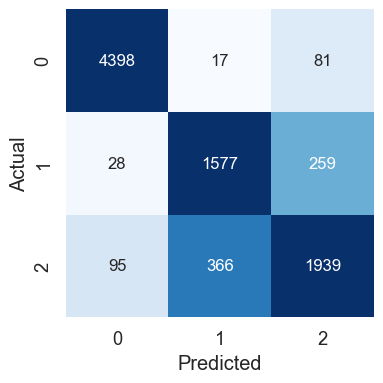

In [30]:
%matplotlib inline
#Draw the confusion matrix with the prediction and actual values 

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size

sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap='Blues')

# 9. Classification Report

In [31]:
#Build a text report table showing the main classification metrics and its accuracy

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4496
           1       0.80      0.85      0.82      1864
           2       0.85      0.81      0.83      2400

    accuracy                           0.90      8760
   macro avg       0.88      0.88      0.88      8760
weighted avg       0.90      0.90      0.90      8760



# 10. Out-of-sample Predictions

In [32]:
#Create some random number 
data = {'Usage_kWh':  [55.76],
        'Lagging_Reactive_Power_kVarh': [26.24],
        'Leading_Reactive_Power_kVarh': [12],
        'CO2': [0.03],
        'Lagging_Power_Factor': [91],
        'Leading_Power_Factor': [100],
        'NSM': [58500],
        'WeekStatus': [0],
        'Day_of_week': [3],
        }

outOfSampleData = pd.DataFrame(data)

outOfSampleData

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week
0,55.76,26.24,12,0.03,91,100,58500,0,3


In [33]:
#Get the prediction
outOfSamplePredict = Grid_CBC.predict(outOfSampleData)
outOfSamplePredict

array([1])